Project: Basic Economic Model
===
Nikita DOVHAN




In [928]:
import numpy as np
import matplotlib.pyplot as plt

TASK
===

Create a simulation of a simple market where agents are consumers and producers, demonstrating basic economic principles like supply and demand.

The Basic Economic Market Model project involves creating a simplified simulation of a market economy, where agents act as consumers and producers. This project is a great introduction to agent-based modelling in economics, illustrating fundamental economic principles like supply and demand, price mechanisms, and market equilibrium. Here is an in-depth description:

Objective

To simulate a basic market economy where individual agents act as producers and consumers. The goal is to observe how market prices, supply, and demand evolve over time based on the interactions between these agents and their decision-making processes.

Model Description

Agents

* Producers: Create goods or services. They decide on quantities to produce and at what price to sell based on production costs and market demand.

* Consumers: Purchase goods or services based on their preferences, needs, and the market price.

Environment

* A virtual marketplace where transactions between producers and consumers takes place.

* The environment can be abstract without a physical space representation, focusing instead on the dynamics of price and quantity.

Rules

* Supply and Demand Dynamics: Producers adjust their supply based on the market price, and consumers adjust their demand based on their utility and the price.

* Price Adjustment: The market price can adjust based on the aggregate supply and demand.

* Economic Constraints: Consumers have budget constraints, and producers have production limits.

Initial Conditions

* Define initial quantities and prices for the goods or services.

* Set initial economic conditions for the agents, such as initial budgets for consumers and initial production capacities for producers.

Simulation Loop

* At each time step, producers and consumers make decisions based on current market conditions.

* Update the market price based on the total supply and demand.

* Update the state of each agent (e.g., producers’ inventory and consumers’ budget) post transactions.

Data Collection

* Track changes in market prices, supply, and demand over time.

* Analyse patterns such as market equilibrium, shortages, or surpluses.

Tools and Libraries

* Python, as the programming language, is ideal for this simulation.

* NumPy for numerical calculations, especially for handling large arrays of agent data.

* Matplotlib or Seaborn for visualizing market trends and agent behaviours over time.

Outcome

The simulation should depict how market dynamics evolve from the interaction of supply and demand.

You can observe how prices fluctuate to balance supply and demand and reach a market equilibrium under various scenarios.

The model can be used to study the impact of different economic policies, such as taxes or subsidies, on the market.

The Basic Economic Market Model project provides you with an understanding of how individual decisions collectively impact the economy. It serves as an excellent tool for visualizing and understanding economic concepts and the functioning of markets. 

In [929]:
num_producers = 100
num_consumers = 500
initial_price = 10  # Initial market price

In [930]:
producers = []
for i in range(num_producers):
    production_cost = np.random.normal(10, 2)  # Production cost for each producer
    production_limit = np.random.randint(50, 150)  # Production limit for each producer
    producers.append((production_cost, production_limit))
producers

[(11.651274863974002, 98),
 (8.119475006540236, 108),
 (11.88328587534125, 139),
 (8.657172779877733, 60),
 (9.045957674867806, 106),
 (9.997492236598978, 80),
 (10.982145392909603, 105),
 (10.113129535912964, 50),
 (10.09959837535016, 57),
 (12.606120153733446, 103),
 (8.54128414112193, 65),
 (9.182444041328516, 90),
 (9.74223480119022, 140),
 (10.451730871912556, 107),
 (13.060449317701377, 73),
 (9.550812848766956, 100),
 (6.383290202191517, 123),
 (11.266163205354765, 54),
 (8.816614472490029, 144),
 (11.272118919332483, 120),
 (8.090421932467953, 58),
 (9.089055146664677, 92),
 (8.715791068877756, 83),
 (12.650515441897923, 83),
 (9.420820020892803, 132),
 (10.743867591081187, 120),
 (8.001816774197483, 98),
 (10.35617638181388, 64),
 (10.658394648208219, 100),
 (7.498024162720275, 100),
 (12.421034611941387, 133),
 (8.208901911082993, 50),
 (7.249091826182702, 61),
 (9.452363320655747, 131),
 (11.254806611921332, 128),
 (9.168089162277512, 100),
 (8.477793208716918, 134),
 (11.72

In [931]:
consumers = []
for i in range(num_consumers):
    budget = np.random.randint(50, 200)  # Budget for each consumer
    utility = np.random.uniform(0, 1)  # Utility for each consumer
    consumers.append((budget, utility))
consumers

[(197, 0.9899669955030416),
 (63, 0.49668409105376654),
 (64, 0.32702222745657694),
 (138, 0.776739952214047),
 (171, 0.3715948768435505),
 (57, 0.005226625724089717),
 (164, 0.7988913162151415),
 (67, 0.7401157714317533),
 (125, 0.43253495960915633),
 (190, 0.8699674141600402),
 (137, 0.6015198376309291),
 (86, 0.9555813476871607),
 (144, 0.1602793165070323),
 (51, 0.251600821914188),
 (150, 0.9790245780992974),
 (70, 0.6516328557948663),
 (91, 0.506758928703537),
 (128, 0.7482620561737524),
 (161, 0.07007381560941428),
 (156, 0.04449373774545562),
 (58, 0.044824552389820194),
 (91, 0.41923092197887013),
 (161, 0.5200550543386822),
 (117, 0.5971305586870516),
 (105, 0.17725348637068072),
 (163, 0.9887375569019973),
 (143, 0.9835511853515582),
 (76, 0.03221851897896155),
 (107, 0.11388573436812144),
 (53, 0.25886255580052664),
 (183, 0.5859304443296829),
 (76, 0.5365482360128473),
 (102, 0.2511365206106744),
 (126, 0.3407190841270282),
 (95, 0.19269149119681916),
 (131, 0.6378084372651

In [932]:
market_price = initial_price
total_supply = 0  # Total supply of goods from producers
total_demand = 0  # Total demand for goods from consumers

In [933]:
num_steps = 100  # Number of time steps
prices = []  # Store market prices over time
consumer_demands = []  # Store consumer demands over time
producer_supplies = []  # Store producer supplies over time


for step in range(num_steps):
    # Producer decisions and supply
    producer_supply = []
    for producer in producers:
        supply = np.clip(producer[0] / (producer[1] / market_price), 0, producer[1])
        producer_supply.append(supply)

    total_supply = sum(producer_supply)

    # Consumer decisions and demand
    consumer_demand = []
    for consumer in consumers:
        demand = np.clip(consumer[0] * consumer[1] / market_price, 0, total_supply)
        consumer_demand.append(demand)

    total_demand = sum(consumer_demand)

    # Price adjustment
    if total_demand > total_supply:  # Excess demand, price increases
        market_price += 1
    elif total_supply > total_demand:  # Excess supply, price decreases
        market_price -= 1

    # Market transactions and update agent states
    producer_transactions = {}  # Allocated quantity for each producer
    consumer_transactions = {}  # Purchased quantity for each consumer

    for consumer, consumer_demand in enumerate(consumer_demand):
        for producer, producer_supply in enumerate(producer_supply):
            if consumer_demand > 0 and producer_supply > 0:  # Consumer can make a purchase and producer has surplus
                transaction_quantity = min(consumer_demand, producer_supply)  # Allocate minimum quantity
                producer_transactions[(producer,)] = transaction_quantity
                consumer_transactions[(consumer,)] = transaction_quantity
                consumer_demand -= transaction_quantity
                producer_supply -= transaction_quantity
                break

    for producer, transaction_quantity in producer_transactions.items():
        producers[producer][1] -= transaction_quantity
    for consumer, transaction_quantity in consumer_transactions.items():
        consumers[consumer][0] -= transaction_quantity * market_price

    # Record market price, consumer demand, and producer supply
    prices.append(market_price)
    consumer_demands.append(total_demand)
    producer_supplies.append(total_supply)

TypeError: 'numpy.float64' object is not iterable

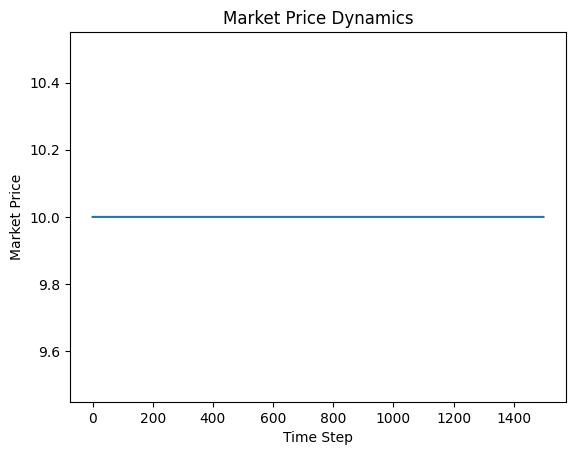

In [ ]:
plt.figure()
plt.plot(range(num_steps), [market_price] * num_steps)
plt.xlabel('Time Step')
plt.ylabel('Market Price')
plt.title('Market Price Dynamics')
plt.show()

In [ ]:
plt.figure()
plt.plot(range(num_steps), prices, label='Market Price')
plt.plot(range(num_steps), consumer_demands, label='Consumer Demand', linestyle='--')
plt.plot(range(num_steps), producer_supplies, label='Producer Supply', linestyle='-.')
plt.xlabel('Time Step')
plt.ylabel('Quantity')
plt.legend()
plt.title('Market')
plt.show()

NameError: name 'prices' is not defined

<Figure size 640x480 with 0 Axes>